**For mounting the google drive with git and pulling changes**


In [13]:
import matplotlib.pyplot as plt

In [2]:
from Files import Architecture
from Files import Data_Loading
from Files import Model
from Files import Test
from Files import Train


Using TensorFlow backend.


In [15]:
# path for input images
images_path = 'dataset'

# hyper parameters
hyper_params = {"lr": 1e-4,"batch_size": 32,"epochs": 20}

In [16]:
# Load images
trainX, testX, trainY, testY =Data_Loading.load_images_and_labels(images_path)

[INFO] Loading Images......
[INFO] Loaded


In [ ]:
# view loaded image
plt.imshow(trainX[0])

In [17]:
# build architecture
model = Architecture.fine_tune_architecture()

In [18]:
#train model
model = Train.training(model,trainX, testX, trainY, testY, hyper_params)

[INFO] compiling model...
[INFO] training head...
Epoch 1/20
34/34 [==============================] - 16s 485ms/step - loss: 0.3131 - accuracy: 0.8736 - val_loss: 0.0895 - val_accuracy: 0.9783

[INFO] evaluating network...  Saim
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       138
           1       0.98      1.00      0.99       138

    accuracy                           0.99       276
   macro avg       0.99      0.99      0.99       276
weighted avg       0.99      0.99      0.99       276

AUC: 0.99


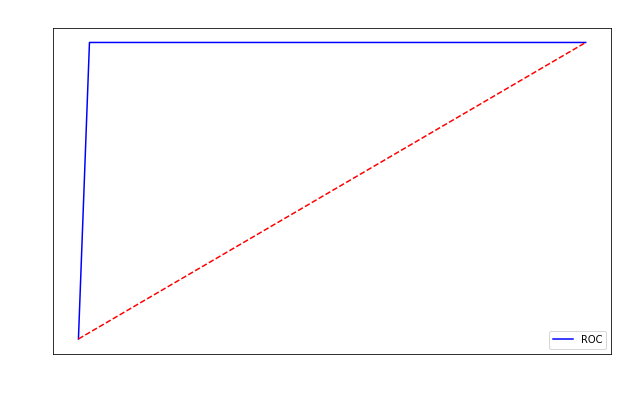

In [19]:
# test accuracy

Test.evalute_report(model,testX,testY,hyper_params)

[INFO] loading face detector model...
[INFO] loading face mask detector model...


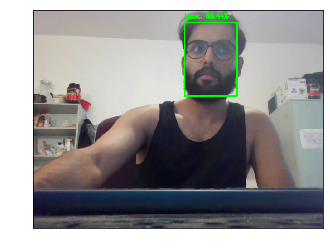

In [22]:
plt.figure(figsize=(36,16))
for i in range(6):
    plt.subplot(2,3,str(i))
    img=Architecture.mask_detection_on_image(str(i)+".jpg")
    plt.imshow(img)

In [3]:
Test.show_img("10.webp")

[INFO] starting video stream...


KeyboardInterrupt: 

In [ ]:
# for webcam only run in colab
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='examples/photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename.split("/")[1]

image_file = take_photo()


In [ ]:
Test.show_img(image_file)

